<a href="https://colab.research.google.com/github/Ananyadevaraju/CE888/blob/main/Assignment_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IS THE US POLICE BIASED?


Importing libraries:

In [24]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',1000)

Loading data:

This dataset is obtained from https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page, which contains records of stop, question and frisk in 2019, from the NYPD database. The dataframe has 13,459 observations and infomration on 83 variables.

In [26]:
#load data 
df = pd.read_csv("https://raw.githubusercontent.com/Ananyadevaraju/CE888/main/Assignment_1/sqf-2019.csv")

In [27]:
#shape of the dataframe
df.shape

(13459, 83)

In [28]:
#columns names in the dataframe
df.columns

Index(['STOP_ID_ANONY', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'RECORD_STATUS_CODE',
       'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'SUMMONS_ISSUED_FLAG', 'SUMMONS_OFFENSE_DESCRIPTION',
       'OFFICER_IN_UNIFORM_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'SHIELD_IDENTIFIES_OFFICER_FLAG', 'VERBAL_IDENTIFIES_OFFICER_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG', 'ASK_FOR_CONSENT_FLG',
       'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_FLAG', 'FIREARM_FLAG',
       'KNIFE_CUTTER_FLAG', 'OTHER_WEAPON_F

Missing data:

In [29]:
#checking for NaN values
df.isnull().sum()

STOP_ID_ANONY                                                    0
STOP_FRISK_DATE                                                  0
STOP_FRISK_TIME                                                  0
YEAR2                                                            0
MONTH2                                                           0
DAY2                                                             0
STOP_WAS_INITIATED                                               0
RECORD_STATUS_CODE                                               0
ISSUING_OFFICER_RANK                                             0
ISSUING_OFFICER_COMMAND_CODE                                     0
SUPERVISING_OFFICER_RANK                                         0
SUPERVISING_OFFICER_COMMAND_CODE                                 0
LOCATION_IN_OUT_CODE                                             0
JURISDICTION_CODE                                                0
JURISDICTION_DESCRIPTION                                      

Drop columns:

In [30]:
#dropping columns with same class/value for all observations
stop_search_df = df.drop(columns = ["YEAR2", "RECORD_STATUS_CODE", "PHYSICAL_FORCE_RESTRAINT_USED_FLAG"], axis = 1)

In [15]:
#dropping redundant columns (example: code and its description for a feature)
stop_search_df = stop_search_df.drop(columns = ["JURISDICTION_CODE", "DEMEANOR_CODE"], axis = 1)

In [16]:
#dropping columns with information about the officers which are irrelevant for this study
stop_search_df.drop(columns = ["ID_CARD_IDENTIFIES_OFFICER_FLAG", "SHIELD_IDENTIFIES_OFFICER_FLAG", "VERBAL_IDENTIFIES_OFFICER_FLAG"], axis = 1, inplace = True) 

In [19]:
#dropping feature columns information on location which are not being used in this study(like latitude, longitude and retaining necessary information on location)
stop_search_df.drop(columns = ["STOP_LOCATION_APARTMENT", "STOP_LOCATION_FULL_ADDRESS", "STOP_LOCATION_X", "STOP_LOCATION_Y"], axis = 1, inplace = True)

Data transformation and sensitive features:

In [32]:
#arrest feature count of each class
stop_search_df["SUSPECT_ARRESTED_FLAG"].value_counts()

N    9151
Y    4308
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [40]:
#gender feature - count of each class, male and female
stop_search_df["SUSPECT_SEX"].value_counts()
#dropping rows with missing gender values
x = stop_search_df.drop(columns = ["SUSPECT_SEX"], axis= 0)

In [42]:
stop_search_df.shape

(13459, 80)

In [35]:
#value counts of diffferent races stopped 
stop_search_df["SUSPECT_RACE_DESCRIPTION"].value_counts() 
                                                                                                                                                                                                                                                                                                                      
#converting all classes other than Whites as Non-Whites - creating binary sensitive variable


for x in stop_search_df["SUSPECT_RACE_DESCRIPTION"]:
  if x == "Whites":
    x = "whites"                               

BLACK                        7981
WHITE HISPANIC               2742
WHITE                        1215
BLACK HISPANIC               1127
ASIAN / PACIFIC ISLANDER      301
(null)                         85
AMERICAN INDIAN/ALASKAN N       8
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

Testing for bias in data:

Is the data imbalanced?


Objective:

We want to train a classification model to classify whether a subject stopped will be arrested or not. The objective is to analyze whether sensitive features like gender and race of the subject determines the outcome, arrest or no arrest.

The target/outcome variable is given by "SUSPECT_ARRESTED_FLAG" column in the dataset.


In [31]:
target = ["SUSPECT_ARRESTED_FLAG"]

We will initially select important attributes about subject like gender, race, frisk, search, and suspicion as the input variables to train the model.

Data visualization:

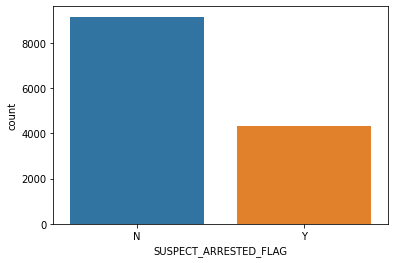

In [ ]:
#racial distributions among the arrested subjects
sns.countplot(x="SUSPECT_ARRESTED_FLAG", data=stop_search_df)

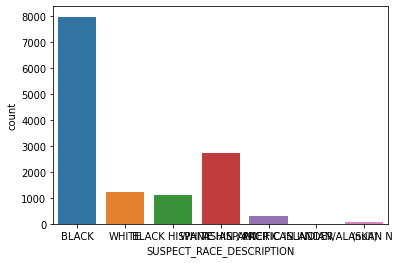

In [ ]:
sns.countplot(x="SUSPECT_RACE_DESCRIPTION", data=stop_search_df)

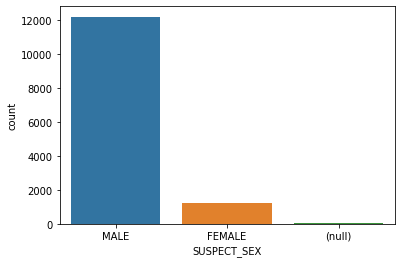

In [ ]:
#count of different genders in the data
sns.countplot(x="SUSPECT_SEX", data=stop_search_df)

In [43]:
#gender distribution among the arrested subjects


In [ ]:
#racial distributions in frisked data


In [ ]:
#racial distributions in searched data


In [ ]:
#veil of darkness
#racial distributions of subjects during day and night

Data Preprocessing:

In [ ]:
#target column
y = stop_search_df["SUSPECT_ARRESTED_FLAG"]

In [ ]:
#features
categorical_columns = [" "]